# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.distributions as dist

%config InlineBackend.figure_format = 'retina'

# Calculating the prior

In [2]:
dist1 = dist.Binomial(5, (1/3))
calc_prior_not_punct = lambda x: dist1.log_prob(torch.Tensor([x])).exp().item()
prior_not_punct = np.array([calc_prior_not_punct(k) for k in range(6)])
prior_not_punct

array([0.13168727, 0.32921815, 0.32921815, 0.16460907, 0.04115227,
       0.00411523])

# Calculating the likelihood

In [3]:
def calc_lik_not_punct(k):
    lik = 1 - (((0.99)**(5-k) ) * ((0.95)**(k)))
    return lik
lik_not_punct = np.array([calc_lik_not_punct(k) for k in range(6)])
lik_not_punct

array([0.04900995, 0.08743379, 0.12430515, 0.15968676, 0.19363881,
       0.22621906])

# Calculating the posterior

In [4]:
def calc_posterior(prior_not_punct, lik_not_punct):
    posterior = prior_not_punct * lik_not_punct / np.sum(prior_not_punct * lik_not_punct)
    return posterior
posterior = calc_posterior(prior_not_punct, lik_not_punct)
print(f'Posterior sums to {posterior.sum()}')
print(posterior)

Posterior sums to 1.0
[0.05796241 0.25851244 0.3675287  0.23607014 0.07156564 0.00836068]


# Plotting

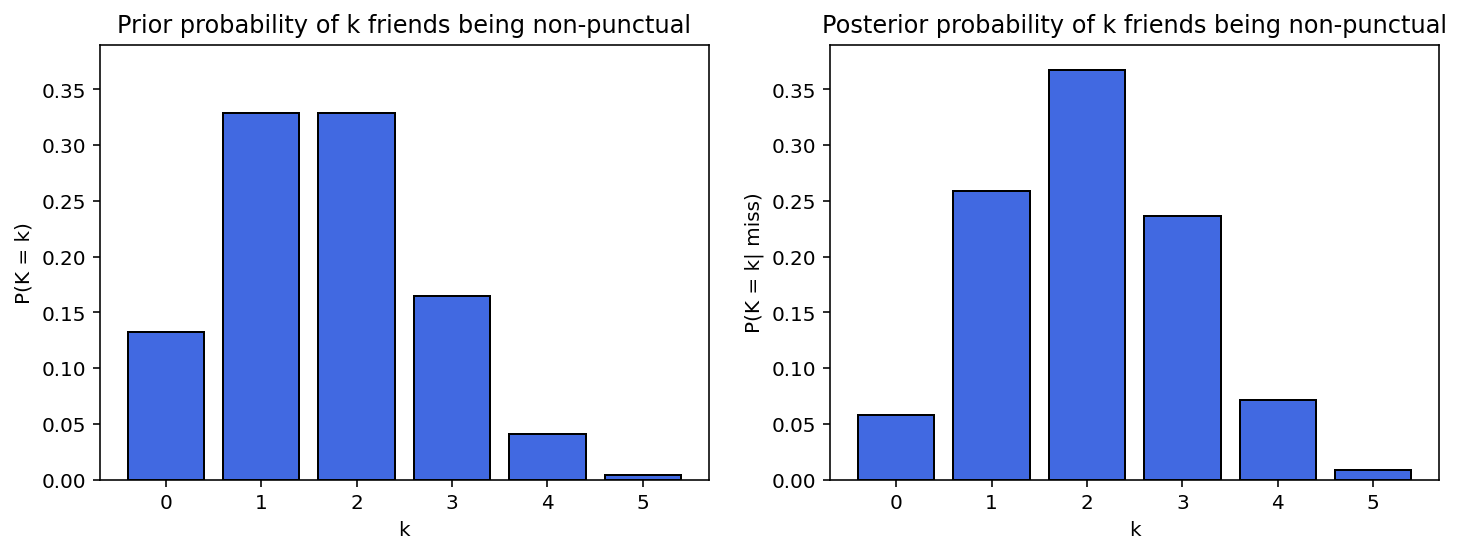

In [6]:
priors = [0.132, 0.329, 0.329, 0.165, 0.041, 0.004]
posteriors = posterior
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.set_title("Prior probability of k friends being non-punctual")
ax1.set_xlabel('k')
ax1.set_ylabel('P(K = k)')
ax1.set_ylim(0, 0.39)
ax1.bar(list(range(6)), priors, color = 'royalblue', edgecolor = 'black');
ax2.set_title("Posterior probability of k friends being non-punctual")
ax2.set_ylim(0, 0.39)
ax2.set_xlabel('k')
ax2.set_ylabel('P(K = k| miss)')
ax2.bar(list(range(6)), posteriors, color = 'royalblue', edgecolor = 'black');